In [1]:
# This demo draws heavily from the handwritten digit example in
# Chapter 2 of Francois Chollet's "Deep Learning with Python" book.
# I've added a simpler single-layer example first before moving to
# the 2-layer example. -George Chen (CMU Fall 2017)

%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

from keras.datasets import mnist
from keras import models
from keras import layers

(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

Using TensorFlow backend.


In [2]:
print(train_images.shape)

(60000, 28, 28)


In [3]:
print(test_images.shape)

(10000, 28, 28)


In [4]:
flattened_train_images = train_images.reshape(len(train_images), -1)  # flattens out each training image
flattened_test_images = test_images.reshape(len(test_images), -1)  # flattens out each test image
flattened_train_images = flattened_train_images.astype(np.float32) / 255  # rescale to be between 0 and 1
flattened_test_images = flattened_test_images.astype(np.float32) / 255  # rescale to be between 0 and 1

from keras.utils import to_categorical
train_labels_categorical = to_categorical(train_labels)
test_labels_categorical = to_categorical(test_labels)

In [5]:
train_labels[0]

5

In [6]:
train_labels_categorical[0]

array([ 0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.], dtype=float32)

In [7]:
print(flattened_train_images.shape)

(60000, 784)


(-0.5, 27.5, 27.5, -0.5)

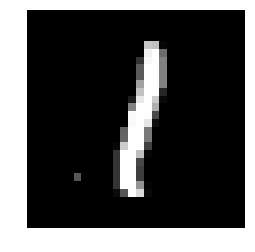

In [8]:
# this plots out one of the training images
idx = np.random.randint(len(train_images))  # random training image index
plt.imshow(train_images[idx], cmap='gray')
plt.axis('off')

(-0.5, 9.5, 783.5, -0.5)

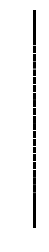

In [9]:
# this is just to visualize what the flattened version of the image above looks like;
# after flattening the image I replicate it horizontally (by 10 pixels) just for
# visualization purposes since otherwise the image is so thin (horizontally) that
# it's not easy to see anything
plt.imshow(np.hstack([train_images[idx].flatten().reshape((784,1))]*10), cmap='gray')
plt.axis('off')

In [10]:
# extremely shallow single-layer model
shallow_single_layer_model = models.Sequential()  # this is Keras's way of specifying a model that is a single sequence of layers
shallow_single_layer_model.add(layers.Dense(10, activation='softmax', input_shape=(784,)))
shallow_single_layer_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 10)                7850      
Total params: 7,850
Trainable params: 7,850
Non-trainable params: 0
_________________________________________________________________


In [11]:
shallow_single_layer_model.compile(optimizer='rmsprop',
                                   loss='categorical_crossentropy',
                                   metrics=['accuracy'])

In [12]:
shallow_single_layer_model.fit(flattened_train_images,
                               train_labels_categorical,
                               validation_split=0.2,
                               epochs=5,
                               batch_size=128)

Train on 48000 samples, validate on 12000 samples
Epoch 1/5
48000/48000 [==============================] - 1s 21us/step - loss: 0.6571 - acc: 0.8392 - val_loss: 0.3586 - val_acc: 0.9019
Epoch 2/5
48000/48000 [==============================] - 1s 19us/step - loss: 0.3504 - acc: 0.9038 - val_loss: 0.3079 - val_acc: 0.9139
Epoch 3/5
48000/48000 [==============================] - 1s 19us/step - loss: 0.3152 - acc: 0.9129 - val_loss: 0.2920 - val_acc: 0.9171
Epoch 4/5
48000/48000 [==============================] - 1s 19us/step - loss: 0.2994 - acc: 0.9163 - val_loss: 0.2815 - val_acc: 0.9214
Epoch 5/5
48000/48000 [==============================] - 1s 19us/step - loss: 0.2893 - acc: 0.9192 - val_loss: 0.2761 - val_acc: 0.9235


In [13]:
test_loss, test_acc = shallow_single_layer_model.evaluate(flattened_test_images, test_labels_categorical)
print('Test accuracy:', test_acc)

10000/10000 [==============================] - 0s 24us/step
Test accuracy: 0.9216


In [14]:
# two-layer model
two_layer_model = models.Sequential()  # this is Keras's way of specifying a model that is a single sequence of layers
two_layer_model.add(layers.Dense(512, activation='relu', input_shape=(784,)))
two_layer_model.add(layers.Dense(10, activation='softmax'))
two_layer_model.compile(optimizer='rmsprop',
                        loss='categorical_crossentropy',
                        metrics=['accuracy'])
two_layer_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2 (Dense)              (None, 512)               401920    
_________________________________________________________________
dense_3 (Dense)              (None, 10)                5130      
Total params: 407,050
Trainable params: 407,050
Non-trainable params: 0
_________________________________________________________________


In [15]:
two_layer_model.fit(flattened_train_images,
                    train_labels_categorical,
                    validation_split=0.2,
                    epochs=5,
                    batch_size=128)

Train on 48000 samples, validate on 12000 samples
Epoch 1/5
48000/48000 [==============================] - 5s 111us/step - loss: 0.2906 - acc: 0.9162 - val_loss: 0.1453 - val_acc: 0.9576
Epoch 2/5
48000/48000 [==============================] - 5s 111us/step - loss: 0.1182 - acc: 0.9643 - val_loss: 0.1243 - val_acc: 0.9620
Epoch 3/5
48000/48000 [==============================] - 5s 97us/step - loss: 0.0769 - acc: 0.9771 - val_loss: 0.0886 - val_acc: 0.9733
Epoch 4/5
48000/48000 [==============================] - 5s 97us/step - loss: 0.0554 - acc: 0.9840 - val_loss: 0.0830 - val_acc: 0.9765
Epoch 5/5
48000/48000 [==============================] - 5s 97us/step - loss: 0.0407 - acc: 0.9879 - val_loss: 0.0877 - val_acc: 0.9758


In [16]:
test_loss, test_acc = two_layer_model.evaluate(flattened_test_images, test_labels_categorical)
print('Test accuracy:', test_acc)

10000/10000 [==============================] - 1s 61us/step
Test accuracy: 0.9772


In [19]:
#CNN: learn the input as 2D image. Do not flatten.
#reshape is to add a new dimension(in this case, color) into the original dimension
scaled_train_images = train_images.reshape(len(train_images), train_images.shape[1], train_images.shape[2], -1)  
scaled_test_images = test_images.reshape(len(test_images), test_images.shape[1], test_images.shape[2], -1) 
scaled_train_images = scaled_train_images.astype(np.float32) / 255  # rescale to be between 0 and 1
scaled_test_images = scaled_test_images.astype(np.float32) / 255  # rescale to be between 0 and 1

In [20]:
print(scaled_train_images.shape)

(60000, 28, 28, 1)


In [21]:
#32:number of filters; (3,3):filter size, do not need to mention the depth(color) dimension; (28,28,1):1 means no color
simple_convnet_model = models.Sequential()
simple_convnet_model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
simple_convnet_model.add(layers.MaxPooling2D((2, 2)))
simple_convnet_model.add(layers.Flatten())#Flatten the stacked images into a big dense matrix 
simple_convnet_model.add(layers.Dense(512, activation='relu'))
simple_convnet_model.add(layers.Dense(10, activation='softmax'))
simple_convnet_model.summary()

simple_convnet_model.compile(optimizer='rmsprop',
                             loss='categorical_crossentropy',
                             metrics=['accuracy'])
#Convolution output shape:(None, 26, 26, 32) 
#(26, 26): convolve will shrink the size of the input shape
#32: numbers of kernels

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 5408)              0         
_________________________________________________________________
dense_4 (Dense)              (None, 512)               2769408   
_________________________________________________________________
dense_5 (Dense)              (None, 10)                5130      
Total params: 2,774,858
Trainable params: 2,774,858
Non-trainable params: 0
_________________________________________________________________


676

In [22]:
simple_convnet_model.fit(scaled_train_images,
                         train_labels_categorical,
                         validation_split=0.2,
                         epochs=5,
                         batch_size=128)

Train on 48000 samples, validate on 12000 samples
Epoch 1/5
48000/48000 [==============================] - 51s 1ms/step - loss: 0.1879 - acc: 0.9428 - val_loss: 0.0712 - val_acc: 0.9811
Epoch 2/5
48000/48000 [==============================] - 49s 1ms/step - loss: 0.0546 - acc: 0.9838 - val_loss: 0.0556 - val_acc: 0.9843
Epoch 3/5
48000/48000 [==============================] - 49s 1ms/step - loss: 0.0331 - acc: 0.9897 - val_loss: 0.0559 - val_acc: 0.9829
Epoch 4/5
48000/48000 [==============================] - 52s 1ms/step - loss: 0.0212 - acc: 0.9931 - val_loss: 0.0490 - val_acc: 0.9865
Epoch 5/5
48000/48000 [==============================] - 51s 1ms/step - loss: 0.0138 - acc: 0.9956 - val_loss: 0.0472 - val_acc: 0.9871


In [23]:
test_loss, test_acc = simple_convnet_model.evaluate(scaled_test_images, test_labels_categorical)
print('Test accuracy:', test_acc)

10000/10000 [==============================] - 4s 365us/step
Test accuracy: 0.9871


In [24]:
simple_convnet_model_avoid_overfitting = models.Sequential()
simple_convnet_model_avoid_overfitting.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
simple_convnet_model_avoid_overfitting.add(layers.MaxPooling2D((2, 2)))
simple_convnet_model_avoid_overfitting.add(layers.Flatten())
simple_convnet_model_avoid_overfitting.add(layers.Dense(64, activation='relu'))
simple_convnet_model_avoid_overfitting.add(layers.Dense(10, activation='softmax'))
simple_convnet_model_avoid_overfitting.summary()

simple_convnet_model_avoid_overfitting.compile(optimizer='rmsprop',
                                               loss='categorical_crossentropy',
                                               metrics=['accuracy'])

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 5408)              0         
_________________________________________________________________
dense_6 (Dense)              (None, 64)                346176    
_________________________________________________________________
dense_7 (Dense)              (None, 10)                650       
Total params: 347,146
Trainable params: 347,146
Non-trainable params: 0
_________________________________________________________________


In [25]:
simple_convnet_model_avoid_overfitting.fit(scaled_train_images,
                                           train_labels_categorical,
                                           validation_split=0.2,
                                           epochs=5,
                                           batch_size=128)

Train on 48000 samples, validate on 12000 samples
Epoch 1/5
48000/48000 [==============================] - 28s 580us/step - loss: 0.2903 - acc: 0.9155 - val_loss: 0.1231 - val_acc: 0.9663
Epoch 2/5
48000/48000 [==============================] - 29s 610us/step - loss: 0.0910 - acc: 0.9727 - val_loss: 0.0779 - val_acc: 0.9770
Epoch 3/5
48000/48000 [==============================] - 27s 568us/step - loss: 0.0593 - acc: 0.9820 - val_loss: 0.0648 - val_acc: 0.9814
Epoch 4/5
48000/48000 [==============================] - 25s 512us/step - loss: 0.0435 - acc: 0.9871 - val_loss: 0.0598 - val_acc: 0.9838
Epoch 5/5
48000/48000 [==============================] - 25s 511us/step - loss: 0.0344 - acc: 0.9896 - val_loss: 0.0571 - val_acc: 0.9846


In [26]:
test_loss, test_acc = simple_convnet_model_avoid_overfitting.evaluate(scaled_test_images, test_labels_categorical)
print('Test accuracy:', test_acc)

10000/10000 [==============================] - 2s 207us/step
Test accuracy: 0.983


In [27]:
deeper_convnet_model_avoid_overfitting = models.Sequential()
deeper_convnet_model_avoid_overfitting.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
deeper_convnet_model_avoid_overfitting.add(layers.MaxPooling2D((2, 2)))
deeper_convnet_model_avoid_overfitting.add(layers.Conv2D(32, (3, 3), activation='relu'))
deeper_convnet_model_avoid_overfitting.add(layers.MaxPooling2D((2, 2)))
deeper_convnet_model_avoid_overfitting.add(layers.Flatten())
deeper_convnet_model_avoid_overfitting.add(layers.Dense(64, activation='relu'))
deeper_convnet_model_avoid_overfitting.add(layers.Dense(10, activation='softmax'))
deeper_convnet_model_avoid_overfitting.summary()

deeper_convnet_model_avoid_overfitting.compile(optimizer='rmsprop',
                                               loss='categorical_crossentropy',
                                               metrics=['accuracy'])

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 11, 11, 32)        9248      
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 5, 5, 32)          0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 800)               0         
_________________________________________________________________
dense_8 (Dense)              (None, 64)                51264     
_________________________________________________________________
dense_9 (Dense)              (None, 10)                650       
Total para

In [28]:
deeper_convnet_model_avoid_overfitting.fit(scaled_train_images,
                                           train_labels_categorical,
                                           validation_split=0.2,
                                           epochs=5,
                                           batch_size=128)

Train on 48000 samples, validate on 12000 samples
Epoch 1/5
48000/48000 [==============================] - 38s 784us/step - loss: 0.2788 - acc: 0.9158 - val_loss: 0.0933 - val_acc: 0.9717
Epoch 2/5
48000/48000 [==============================] - 34s 719us/step - loss: 0.0793 - acc: 0.9748 - val_loss: 0.0621 - val_acc: 0.9814
Epoch 3/5
48000/48000 [==============================] - 36s 740us/step - loss: 0.0541 - acc: 0.9828 - val_loss: 0.0601 - val_acc: 0.9827
Epoch 4/5
48000/48000 [==============================] - 35s 739us/step - loss: 0.0421 - acc: 0.9867 - val_loss: 0.0446 - val_acc: 0.9873
Epoch 5/5
48000/48000 [==============================] - 36s 746us/step - loss: 0.0339 - acc: 0.9895 - val_loss: 0.0458 - val_acc: 0.9869


In [29]:
test_loss, test_acc = deeper_convnet_model_avoid_overfitting.evaluate(scaled_test_images, test_labels_categorical)
print('Test accuracy:', test_acc)

10000/10000 [==============================] - 3s 256us/step
Test accuracy: 0.9889


Think!<br>
If we use (26,26,32) dense layer to learn the neural net, how many parameters we need to learn? <br>
==>The number of parameters we need to learn will be very large compared to convolution, since convolve will reduce the number of parameters.<br>
Always favor the simpler model, provided the same performance.